# WeatherPy
----

## Observable trends:

- Regardless the hemisphere, cities which are located close to the equator line (latitude equal zero) will have higher temperature than the ones far away. The cities located neareast to the earth poles tend to have the lowest temperatures, meaning that there is a strong relationship between temperature and latitude.

- Confronting latitude and humidity, as well as latitude and cloudiness or latitude and wind speed, it is possible to notice that the correlation between them is very weak and sometimes there is no correlation at all. Therefore, there are other reasons why humidity, cloudiness and wind speed changes in certain regions.

- This dataset represents a larger number of cities located in the northern hemisphere, however, this is not something that would affect trends and checking the line equation of each plot it is possible to predict this trends. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
import seaborn as sns
from scipy.stats import linregress

%matplotlib inline

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

In [3]:
# Build partial query URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="    

print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=80a38289e41f665c402bf8489ce1f615&units=imperial&q=


### Perform API Calls

In [4]:
# Lists for holding data from openweathermap
city_name = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Create counters
index_counter = 0
set_counter = 1

# loop through each city, get index for logging purpose and append info in lists
for index, city in enumerate(cities):
    
    # Run an API request for each of the cities
    try:
        
        # Add a one second interval between queries to stay within API query limits
        time.sleep(1)
        # Create endpoint URL with each city and parse to JSON
        response = requests.get(query_url + city).json()
        
        # Append info to each list
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        
        # Create sets of 50 for logging purposes
        if index_counter > 49:
            index_counter = 0
            set_counter += 1
    
        else:
            index_counter += 1
        
        # Log the index and set numbers
        print(f"Processing Record {index_counter} of Set {set_counter} | {city}") 
  
    # If an error is experienced, skip the city
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
# Indicate that Data Loading is complete         
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | airai
Processing Record 4 of Set 1 | cherskiy
City not found. Skipping...
Processing Record 5 of Set 1 | vila franca do campo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | alofi
Processing Record 8 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 9 of Set 1 | college
City not found. Skipping...
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | kingsland
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | oshikango
Processing Record 15 of Set 1 | bull savanna
Processing Record 16 of Set 1 | chuy
Processing Record 17 of Set 1 | victoria
Processing Record 18 of Set 1 | cape coast
Processing Record 19 of Set 1 | plouzane
City not found. Skipping...
Processing Record 20 of Set 1 | cabo san lucas
Processing Record 21 of Set 1 | clyde river
Processing Record 22 

Processing Record 39 of Set 4 | broken hill
Processing Record 40 of Set 4 | mwinilunga
Processing Record 41 of Set 4 | kavaratti
City not found. Skipping...
Processing Record 42 of Set 4 | portland
Processing Record 43 of Set 4 | rocha
Processing Record 44 of Set 4 | maldonado
Processing Record 45 of Set 4 | yokadouma
Processing Record 46 of Set 4 | troitsko-pechorsk
Processing Record 47 of Set 4 | antofagasta
City not found. Skipping...
Processing Record 48 of Set 4 | thompson
Processing Record 49 of Set 4 | murgab
Processing Record 50 of Set 4 | saskylakh
Processing Record 0 of Set 5 | saint george
Processing Record 1 of Set 5 | port augusta
Processing Record 2 of Set 5 | bulgan
Processing Record 3 of Set 5 | agadez
City not found. Skipping...
Processing Record 4 of Set 5 | parati
Processing Record 5 of Set 5 | colesberg
Processing Record 6 of Set 5 | teshie
Processing Record 7 of Set 5 | calama
Processing Record 8 of Set 5 | nemuro
Processing Record 9 of Set 5 | port-cartier
Process

Processing Record 20 of Set 8 | afyonkarahisar
Processing Record 21 of Set 8 | chokurdakh
Processing Record 22 of Set 8 | opuwo
City not found. Skipping...
Processing Record 23 of Set 8 | diffa
Processing Record 24 of Set 8 | pauini
Processing Record 25 of Set 8 | ilebo
Processing Record 26 of Set 8 | nalut
Processing Record 27 of Set 8 | kahului
Processing Record 28 of Set 8 | batagay-alyta
City not found. Skipping...
Processing Record 29 of Set 8 | svetlogorsk
Processing Record 30 of Set 8 | manacapuru
Processing Record 31 of Set 8 | high level
Processing Record 32 of Set 8 | benguela
Processing Record 33 of Set 8 | sao filipe
Processing Record 34 of Set 8 | malindi
Processing Record 35 of Set 8 | nishihara
Processing Record 36 of Set 8 | muzhi
City not found. Skipping...
City not found. Skipping...
Processing Record 37 of Set 8 | zhigansk
Processing Record 38 of Set 8 | kutum
Processing Record 39 of Set 8 | cururupu
City not found. Skipping...
Processing Record 40 of Set 8 | lubyany

### Convert Raw Data to DataFrame

In [5]:
# Convert array of JSONs into Pandas DataFrame
city_data = pd.DataFrame({"City": city_name, 
                          "Cloudiness (%)": cloudiness,
                          "Country": country,
                          "Date": date,
                          "Latitude": lat, 
                          "Longitude": lon, 
                          "Max Temp (F)": max_temp,
                          "Humidity (%)": humidity,
                          "Wind Speed (mph)": wind_speed})    

# Export the City_Data into a csv
city_data.to_csv("WeatherPy.csv",encoding="utf-8",index=False)

# Show Record Count
city_data.head()

,City,Cloudiness (%),Country,Date,Latitude,Longitude,Max Temp (F),Humidity (%),Wind Speed (mph)
0,Atuona,77,PF,1604706611,-9.80,-139.03,78.30,76,15.93
1,Jamestown,1,US,1604706475,42.10,-79.24,59.00,51,8.05
2,Airai,3,TL,1604706613,-8.93,125.41,74.21,42,4.72
3,Cherskiy,78,RU,1604706614,68.75,161.30,9.05,95,12.41
4,Vila Franca do Campo,40,PT,1604706548,37.72,-25.43,62.60,67,14.99


## Plotting the Data

## Latitude vs. Temperature

In [6]:
#set seaborn grid for all plots
sns.set(style="darkgrid")

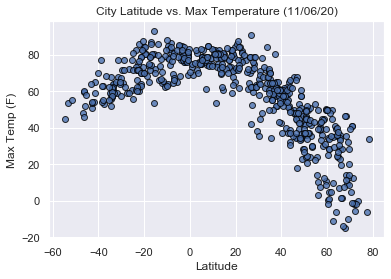

In [7]:
# Generate the scatter plot
plt.scatter(city_data['Latitude'], 
            city_data['Max Temp (F)'], 
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Give the plot a title, x label, y label and grid 
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# Save the figure
plt.savefig("../output_data/Latitude vs Max Temperature.png")

# Display plot
plt.show()

- The plot shows that cities locate close to the equator line (zero latitude) have higher temperature. 
- Besides, the dataset has greater number of cities in the north hemisphere than south hemisphere.

## Latitude vs. Humidity

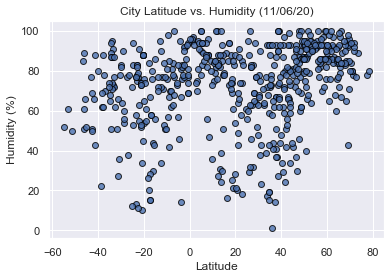

In [8]:
# Generate the scatter plot
plt.scatter(city_data['Latitude'], 
            city_data['Humidity (%)'], 
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label='City')

# Give the plot a title, x label, y label and grid 
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("../output_data/Latitude vs Humidity.png")

# Display plot
plt.show()

- The plot shows that there is no strong relationship between humidity and latitude, as cities are all spread out along latitude.
- This code provides a clue about this relationship, however, adding other information, such as linear regression, rvalue and line equation, would give the code more meaning, it would be easer to identify how strong this relationship is.

## Latitude vs. Cloudiness

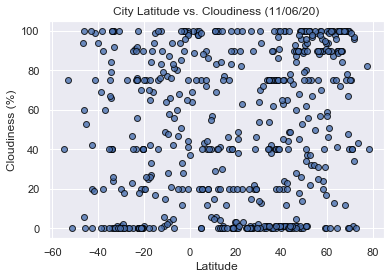

In [9]:
# Generate the scatter plot
plt.scatter(city_data['Latitude'], 
            city_data['Cloudiness (%)'], 
            edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Give the plot a title, x label, y label and grid 
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("../output_data/Latitude vs Cloudiness.png")

# Display plot
plt.show()

- The plot shows that there is no strong relationship between cloudiness levels and latitude, as cities are all spread out along latitude. 
- Following the same pattern of previous plot, this code would be more meaningful if combined with linear regression, rvalue and line equation.

## Latitude vs. Wind Speed

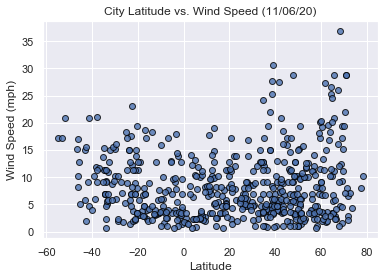

In [10]:
# Generate the scatter plot
plt.scatter(city_data['Latitude'], 
            city_data['Wind Speed (mph)'], 
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Give the plot a title, x label, y label and grid 
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Save the figure
plt.savefig("../output_data/Latitude vs Wind Speed.png")

# Display plot
plt.show()

- The plot shows that most likely there is a weak relationship Wind Speed and Latitude. Once again, the code would be more meaningful if combined with linear regression, rvalue and line equation.

## Linear Regression

In [11]:
# Locate the Northern Hemisphere (greater than or equal to 0 degrees latitude) and 
# Southern Hemisphere (less than 0 degrees latitude):
north_cities = city_data.loc[city_data['Latitude'] >= 0, :]
south_cities = city_data.loc[city_data['Latitude'] < 0, :]

# Define a function for creating linear regression, scatter plot, and .png file
def linear_regression (x,y, title, xlabel, ylabel, coordinates):
    # Calculate the correlation coefficient
    print(f'The rvalue is {round(st.pearsonr(x,y)[0],2)}')
    
    # Find the linear regression
    (slope, intercept, rvalue, pvalue, std_err) = linregress(x,y)
    
    # Get regression values 
    regress_values = x * slope + intercept
    
    # Create a line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot
    plt. scatter(x,y)
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, coordinates, fontsize = 15, color='red')
    plt.title(title + "(%s)" % time.strftime("%x"))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig("../output_data/" + title + ".png")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The rvalue is -0.85


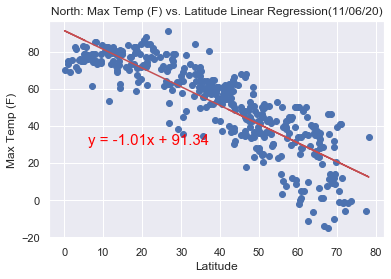

In [21]:
# Call function for creating linear regression, scatter plot, proper plot format and .png file
north_max_temp = linear_regression(north_cities['Latitude'], north_cities['Max Temp (F)'], 
                "North: Max Temp (F) vs. Latitude Linear Regression", "Latitude", "Max Temp (F)", (6,30))

- This plot shows the strong negative reletationship between temperatures and latitudes. Higher (positive) latitude leads to lower temperatures, and vice versa. This code is very meaninful, the linear regression, rvalue and line equation serve to prove this strong relationship.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The rvalue is 0.7


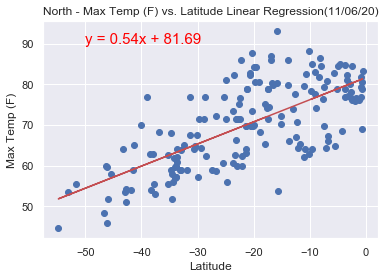

In [27]:
# Call function for creating linear regression, scatter plot, proper plot format and .png file
south_max_temp = linear_regression(south_cities['Latitude'], south_cities['Max Temp (F)'], 
                "North - Max Temp (F) vs. Latitude Linear Regression", "Latitude", "Max Temp (F)", (-50,90))

- This plot shows the strong positive reletationship between temperatures and latitudes. Higher (negatige) latitude leads to lower temperatures, and vice versa. This code is complete because linear regression, rvalue and line equation serve to prove this strong relationship.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The rvalue is 0.2


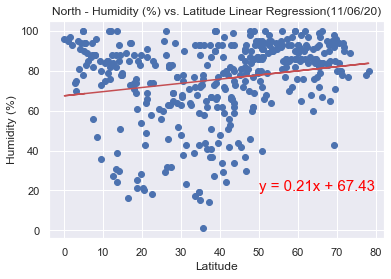

In [20]:
# Call function for creating linear regression, scatter plot, proper plot format and .png file
north_humidity = linear_regression(north_cities['Latitude'], north_cities['Humidity (%)'], 
                "North - Humidity (%) vs. Latitude Linear Regression", "Latitude", "Humidity (%)", (50,20))

- This plot shows that there is a very weak relationship between humidity and latitude in the Northern Hemisphere. The code is complete, as rvalue and equation line detailed well this fact.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The rvalue is 0.12


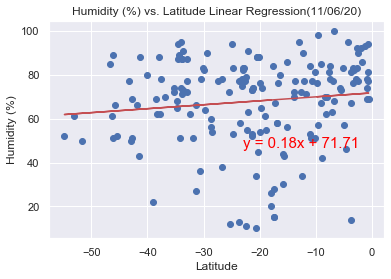

In [15]:
# Call function for creating linear regression, scatter plot, proper plot format and .png file
south_humidity = linear_regression(south_cities['Latitude'], south_cities['Humidity (%)'], 
                "Humidity (%) vs. Latitude Linear Regression", "Latitude", "Humidity (%)", (-23,47))

- This plot shows that there is a very weak relationship between humidity and latitude in the Southern Hemisphere. The code is complete, as rvalue and equation line detailed well this fact.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The rvalue is 0.27


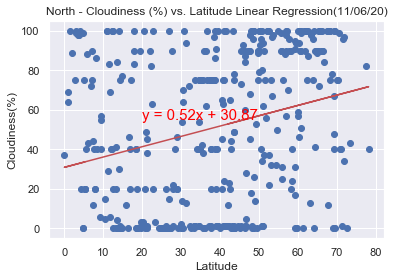

In [26]:
# Call function for creating linear regression, scatter plot, proper plot format and .png file
north_cloudiness = linear_regression(north_cities['Latitude'], north_cities['Cloudiness (%)'], 
                "North - Cloudiness (%) vs. Latitude Linear Regression", "Latitude", "Cloudiness(%)", (20,55))

- This plot shows that there is a weak relationship between cloudiness and latitude in the Northern Hemisphere. The code is complete, as rvalue represented well this fact.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The rvalue is 0.15


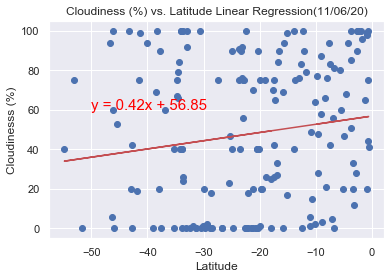

In [17]:
# Call function for creating linear regression, scatter plot, proper plot format and .png file
south_cloudiness = linear_regression(south_cities['Latitude'], south_cities['Cloudiness (%)'], 
                "Cloudiness (%) vs. Latitude Linear Regression", "Latitude", "Cloudinesss (%)", (-50,60))

- This plot shows that there is a weak relationship between humidity and latitude in the Southern Hemisphere. The code is complete, as rvalue detailed well this fact.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The rvalue is 0.22


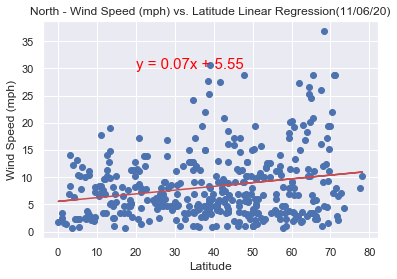

In [25]:
# Call function for creating linear regression, scatter plot, proper plot format and .png file
north_wind_speed = linear_regression(north_cities['Latitude'], north_cities['Wind Speed (mph)'], 
                "North - Wind Speed (mph) vs. Latitude Linear Regression", "Latitude", "Wind Speed (mph)", (20,30))

- This plot shows that there is a very weak relationship between wind speed and latitude in the Northern Hemisphere. The code is complete, as rvalue reprented well this fact.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The rvalue is -0.34


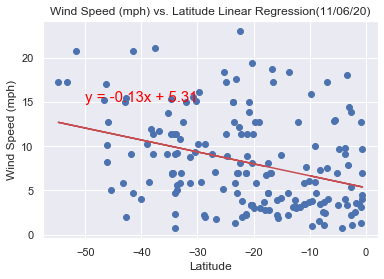

In [19]:
# Call function for creating linear regression, scatter plot, proper plot format and .png file
south_wind_speed = linear_regression(south_cities['Latitude'], south_cities['Wind Speed (mph)'], 
                "Wind Speed (mph) vs. Latitude Linear Regression", "Latitude", "Wind Speed (mph)", (-50,15))

- This plot shows the relationship between wind speed and latitude in the Southern Hemisphere. The code is complete and rvalue proves that there is almost no correlation between them.